In [1]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
import math
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 

import matplotlib.pyplot as plt
%matplotlib inline

Data Preprocessing

In [2]:
#Reading the CSV/dropping null values and used values method 
df = pd.read_csv('winequality-combined.csv')
df1 = df.dropna()
df2 = df1.values

In [3]:
# Separating Dataset into Features and Target Variables
# X: (First 12 Columns)
# y: (Column 13)
# a-g and j

X = df1[['fixed acidity','volatile acidity','citric acid',
'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']].values
y = df2[:, 12]




In [4]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)


In [5]:
#Using a linear kernel 
from sklearn import svm
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

acc_train_svm_linear = []
acc_test_svm_linear = []

#train
print("Train Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)

    yhat_svc_linear_train = svc_linear.predict(x_train)
    acc_train_linear = np.mean(yhat_svc_linear_train == y_train)
    acc_train_svm_linear.append(acc_train_linear)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_linear)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

print()

#test
print("Test Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)
    yhat_svc_linear_test = svc_linear.predict(x_test)
    acc_test_linear = np.mean(yhat_svc_linear_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test_linear)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_linear)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_svc_linear_test,average='binary')
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
    #print('Test Accuracy = {0:f}'.format(acc_test_linear))
    



Train Accuracy using a Linear kernel
Train Accuracy(c=0.0001): 0.8347123340388686
Train Accuracy(c=0.001): 0.980565710987108
Train Accuracy(c=0.01): 0.9832595728304792
Train Accuracy(c=0.1): 0.9834519915335771
Train Accuracy(c=1): 0.9834519915335771
Train Accuracy(c=10): 0.9834519915335771
Train Accuracy(c=100): 0.9834519915335771

Test Accuracy using a Linear kernel
Test Accuracy(c=0.0001): 0.8538461538461538
Precision: 0.8414429530201343 
Recall: 0.999003984063745 
Fscore: 0.9134790528233151
Test Accuracy(c=0.001): 0.9769230769230769
Precision: 0.980276134122288 
Recall: 0.9900398406374502 
Fscore: 0.9851337958374629
Test Accuracy(c=0.01): 0.9807692307692307
Precision: 0.9860973187686196 
Recall: 0.9890438247011952 
Fscore: 0.9875683739433117
Test Accuracy(c=0.1): 0.9815384615384616
Precision: 0.9870775347912525 
Recall: 0.9890438247011952 
Fscore: 0.9880597014925373
Test Accuracy(c=1): 0.9830769230769231
Precision: 0.9890438247011952 
Recall: 0.9890438247011952 
Fscore: 0.9890438247

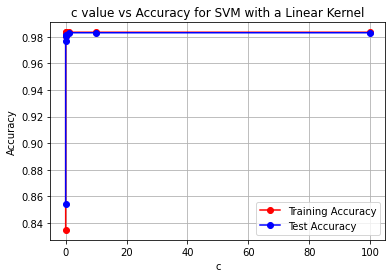

In [11]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_linear, 'ro-')
plt.plot(cVals, acc_test_svm_linear, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("c value vs Accuracy for SVM with a Linear Kernel")
# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [7]:
#Using a rbf kernel 
acc_train_svm_rbf = []
acc_test_svm_rbf = []

#train
print("Train Accuracy using a RBF kernel")
for c in cVals: 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)

    yhat_svc_rbf_train = svc_rbf.predict(x_train)
    acc_train_rbf = np.mean(yhat_svc_rbf_train == y_train)
    acc_train_svm_rbf.append(acc_train_rbf)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_rbf)

print()

#test
print("Test Accuracy using a RBF kernel")
for c in cVals: 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)
    yhat_svc_rbf_test = svc_rbf.predict(x_test)
    acc_test_rbf = np.mean(yhat_svc_rbf_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test_rbf)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_rbf)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_svc_rbf_test,average='binary')
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)

Train Accuracy using a RBF kernel
Train Accuracy(c=0.0001): 0.7492784298633827
Train Accuracy(c=0.001): 0.7492784298633827
Train Accuracy(c=0.01): 0.9782566865499327
Train Accuracy(c=0.1): 0.9890321339234174
Train Accuracy(c=1): 0.9938426015008659
Train Accuracy(c=10): 0.9961516259380412
Train Accuracy(c=100): 0.9984606503752165

Test Accuracy using a RBF kernel
Test Accuracy(c=0.0001): 0.7723076923076924
Precision: 0.7723076923076924 
Recall: 1.0 
Fscore: 0.8715277777777778
Test Accuracy(c=0.001): 0.7723076923076924
Precision: 0.7723076923076924 
Recall: 1.0 
Fscore: 0.8715277777777778
Test Accuracy(c=0.01): 0.9784615384615385
Precision: 0.9765625 
Recall: 0.9960159362549801 
Fscore: 0.9861932938856015
Test Accuracy(c=0.1): 0.9907692307692307
Precision: 0.9920634920634921 
Recall: 0.9960159362549801 
Fscore: 0.9940357852882704
Test Accuracy(c=1): 0.9930769230769231
Precision: 0.9940417080436942 
Recall: 0.9970119521912351 
Fscore: 0.9955246146195923
Test Accuracy(c=10): 0.995384615384

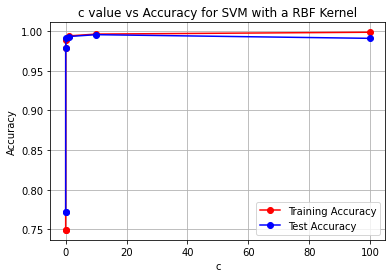

In [8]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_rbf, 'ro-')
plt.plot(cVals, acc_test_svm_rbf, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("c value vs Accuracy for SVM with a RBF Kernel")

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [9]:
#Using a Polynomial kernel 
acc_train_svm_poly = []
acc_test_svm_poly = []

#train
print("Train Accuracy using a poly kernel")
for c in cVals: 
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)

    yhat_svc_poly_train = svc_poly.predict(x_train)
    acc_train_poly = np.mean(yhat_svc_poly_train == y_train)
    acc_train_svm_poly.append(acc_train_poly)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_poly)

print()

#test
print("Test Accuracy using a poly kernel")
for c in cVals: 
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)
    yhat_svc_poly_test = svc_poly.predict(x_test)
    acc_test_poly = np.mean(yhat_svc_poly_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test_poly)
    print("Test Accuracy(c=" + str(c) + "):", acc_test_poly)
    prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_svc_poly_test,average='binary')
    print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)

Train Accuracy using a poly kernel
Train Accuracy(c=0.0001): 0.7556282470656148
Train Accuracy(c=0.001): 0.84952857417741
Train Accuracy(c=0.01): 0.9393881085241486
Train Accuracy(c=0.1): 0.9715220319415047
Train Accuracy(c=1): 0.9876852030017318
Train Accuracy(c=10): 0.9919184144698865
Train Accuracy(c=100): 0.9957667885318453

Test Accuracy using a poly kernel
Test Accuracy(c=0.0001): 0.78
Precision: 0.7782945736434108 
Recall: 1.0 
Fscore: 0.8753269398430689
Test Accuracy(c=0.001): 0.8638461538461538
Precision: 0.8507209499575912 
Recall: 0.999003984063745 
Fscore: 0.918918918918919
Test Accuracy(c=0.01): 0.9438461538461539
Precision: 0.934640522875817 
Recall: 0.9970119521912351 
Fscore: 0.9648192771084337
Test Accuracy(c=0.1): 0.9723076923076923
Precision: 0.9671814671814671 
Recall: 0.99800796812749 
Fscore: 0.9823529411764705
Test Accuracy(c=1): 0.9869230769230769
Precision: 0.9852507374631269 
Recall: 0.99800796812749 
Fscore: 0.991588322612568
Test Accuracy(c=10): 0.9915384615

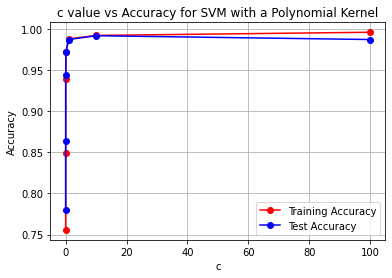

In [10]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_svm_poly, 'ro-')
plt.plot(cVals, acc_test_svm_poly, 'bo-')

plt.grid()

plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("c value vs Accuracy for SVM with a Polynomial Kernel")

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

![Picture title](image-20201126-163711.png)